In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
from sklearn.linear_model import LogisticRegression

In [109]:
%matplotlib notebook

# Generate the features and labels

In [110]:
N = 10**5 # number of samples
K = 2 # number of classes
phi = np.random.rand() # Bernoulli parameter
y = bernoulli.rvs(phi, size=N) #features vector
cov_mat0 = make_spd_matrix(2)
cov_mat1 = make_spd_matrix(2)

mean0 = (np.random.rand(2)-0.5)*16
mean1 = (np.random.rand(2)-0.5)*14

X = multivariate_normal.rvs(mean = mean0, cov = cov_mat0, size=N).T*(1-y) 
X += multivariate_normal.rvs(mean =mean1, cov = cov_mat1, size=N).T*(y)

# Solve through Gausisan discrimitative analysis

In [112]:
phi_est = np.sum(y)/N

where_y_1 = np.where(y==1)[0]
where_y_0 = np.where(y==0)[0]
mu_0_est = np.sum(X[:,where_y_0],axis=1)/where_y_0.size
mu_1_est = np.sum(X[:,where_y_1],axis=1)/where_y_1.size
cov_0_est = ((X[:,where_y_0].T-mu_0_est).T@(X[:,where_y_0].T-mu_0_est))/where_y_0.size
cov_1_est = ((X[:,where_y_1].T-mu_1_est).T@(X[:,where_y_1].T-mu_1_est))/where_y_0.size


<IPython.core.display.Javascript object>


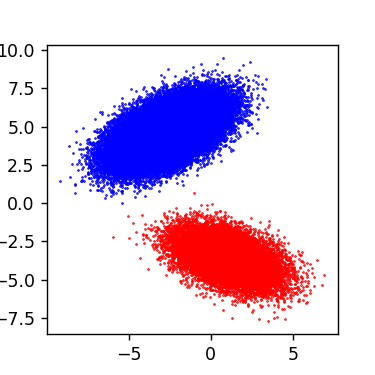

In [132]:
plt.figure(figsize=(3,3))
plt.plot(X[0,where_y_1],X[1,where_y_1],"r.",markersize=1)
plt.plot(X[0,where_y_0],X[1,where_y_0],"b.",markersize=1)


In [113]:
N_test = 10**3
y_test = bernoulli.rvs(phi, size=N_test)
X_test = multivariate_normal.rvs(mean = mean0, cov = cov_mat0, size=N_test).T*(1-y_test) 
X_test += multivariate_normal.rvs(mean =mean1, cov = cov_mat1, size=N_test).T*(y_test)

# Compute p(y=1|x)

In [114]:
num = multivariate_normal(mean =mu_1_est, cov = cov_1_est).pdf(X_test.T)*phi_est
denum = (1-phi_est)*multivariate_normal(mean =mu_0_est, cov = cov_0_est).pdf(X_test.T)+ num
pr1 = num/denum 
prediction1 = np.where(pr1>0.5,1,0)

In [115]:
accuracy = np.sum(abs(prediction-y_test))/y_test.size
print("accuracy GDA= ",100-accuracy*100,"%")

accuracy =  81.2 %


# Logistic regression from SKL

In [128]:
clf = LogisticRegression(random_state=0).fit(X.T, y)
prediction_skl = clf.predict(X_test.T)

In [129]:
accuracy = np.sum(abs(prediction_skl-y_test))/y_test.size
print("accuracy Logistic regression SKL = ",100-accuracy*100,"%")

accuracy Logistic regression SKL =  100.0 %
